<a href="https://colab.research.google.com/github/harshith-118/SoftComputingProjects/blob/main/FUZZY_LOGIC_CONTROLLER_MOBILE_ROBOT_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

# Case Study:<br>

Consider the control of navigation of mobile robot in a presence of number of moving objects<br>

To make the problem simple, consider only 4 moving objects, each of equal size and equal speed.
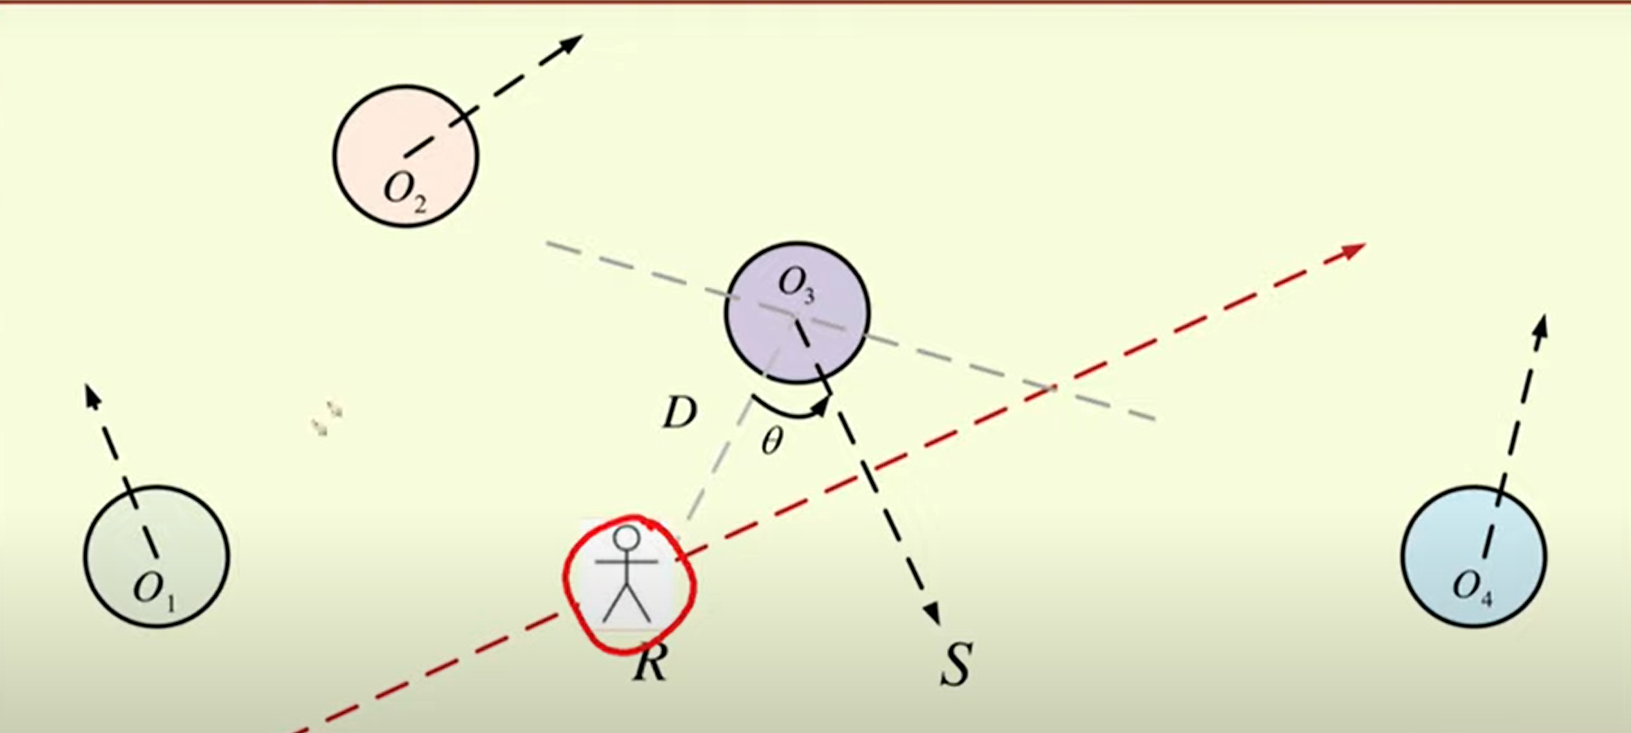

Assumption to be taken while solving this case study:
<br>
1. We consider two parameters: D, the distance from the robot to an object and θ the angle of motion of an object with respect to the robot.
2. The value of these parameters with respect to the most critical object will decide an output called deviation(δ)
3. We assume the range of the values of D[0.1,.......,2.2] in meter and θ[-90,....,0,.....,90]in degree.



In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#fuzzification

#crisp variables
distance = ctrl.Antecedent(np.arange(0.1, 2.2, 0.1), 'distance')
angle = ctrl.Antecedent(np.arange(-90,90,0.1),'angle')
deviation = ctrl.Consequent(np.arange(-90,90,0.1), 'deviation')

#crisp to fuzzy
distance['VN']=fuzz.trimf(distance.universe,[0.1,0.1,0.8])
distance['NR']=fuzz.trimf(distance.universe,[0.1,0.8,1.5])
distance['VF']=fuzz.trapmf(distance.universe,[1.5,2.2,2.5,2.5])
distance['FR']=fuzz.trimf(distance.universe,[0.8,1.5,2.2])

angle['LT']=fuzz.trapmf(angle.universe,[-90,-90,-90,-45])
angle['AL']=fuzz.trimf(angle.universe,[-90,-45,0])
angle['AA']=fuzz.trimf(angle.universe,[-45,0,45])
angle['AR']=fuzz.trimf(angle.universe,[0,45,90])
angle['RT']=fuzz.trapmf(angle.universe,[45,90,90,90])

deviation['LT']=fuzz.trapmf(angle.universe,[-90,-90,-90,-45])
deviation['AL']=fuzz.trimf(angle.universe,[-90,-45,0])
deviation['AA']=fuzz.trimf(angle.universe,[-45,0,45])
deviation['AR']=fuzz.trimf(angle.universe,[0,45,90])
deviation['RT']=fuzz.trimf(angle.universe,[45,90,100])

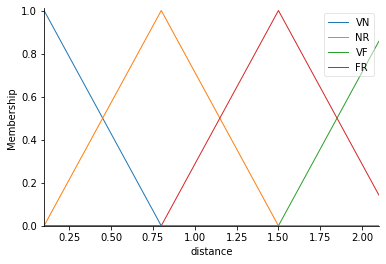

In [ ]:
distance.view()

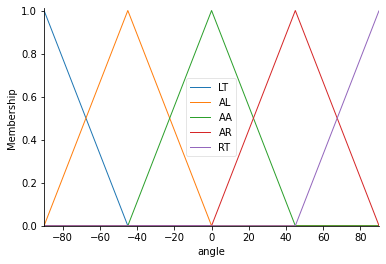

In [ ]:
angle.view()

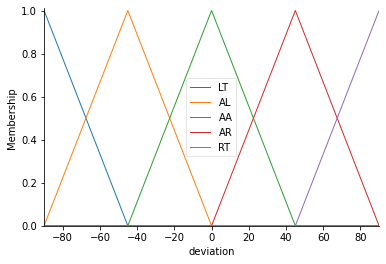

In [ ]:
deviation.view()

### Fuzzy Rule Base

In [ ]:
rule1 = ctrl.Rule(distance['VN'] & angle['LT'], deviation['AA'])
rule2 = ctrl.Rule(distance['VN'] & angle['AL'], deviation['AR'])
rule3 = ctrl.Rule(distance['VN'] & angle['AA'], deviation['AL'])
rule4 = ctrl.Rule(distance['VN'] & angle['AR'], deviation['AL'])
rule5 = ctrl.Rule(distance['VN'] & angle['RT'], deviation['AA'])

rule6 = ctrl.Rule(distance['NR'] & angle['LT'], deviation['AA'])
rule7 = ctrl.Rule(distance['NR'] & angle['AL'], deviation['AA'])
rule8 = ctrl.Rule(distance['NR'] & angle['AA'], deviation['RT'])
rule9 = ctrl.Rule(distance['NR'] & angle['AR'], deviation['AA'])
rule10 = ctrl.Rule(distance['NR'] & angle['RT'], deviation['AA'])

rule11 = ctrl.Rule(distance['FR'] & angle['LT'], deviation['AA'])
rule12 = ctrl.Rule(distance['FR'] & angle['AL'], deviation['AA'])
rule13 = ctrl.Rule(distance['FR'] & angle['AA'], deviation['AR'])
rule14 = ctrl.Rule(distance['FR'] & angle['AR'], deviation['AA'])
rule15 = ctrl.Rule(distance['FR'] & angle['RT'], deviation['AA'])

rule16 = ctrl.Rule(distance['VF'] & angle['LT'], deviation['AA'])
rule17 = ctrl.Rule(distance['VF'] & angle['AL'], deviation['AA'])
rule18 = ctrl.Rule(distance['VF'] & angle['AA'], deviation['AA'])
rule19 = ctrl.Rule(distance['VF'] & angle['AR'], deviation['AA'])
rule20 = ctrl.Rule(distance['VF'] & angle['RT'], deviation['AA'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33befeff90>)

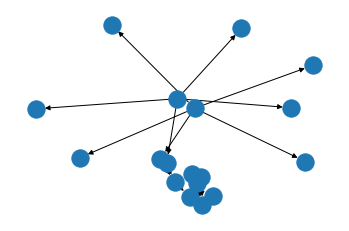

In [ ]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33b676b290>)

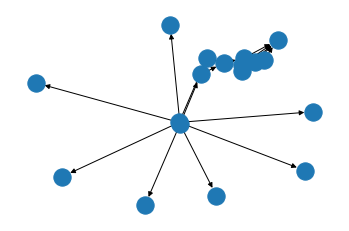

In [ ]:
rule16.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33bf0712d0>)

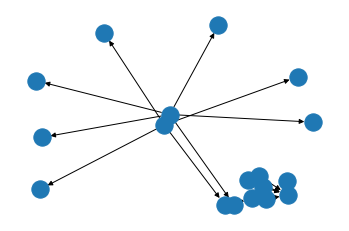

In [ ]:
rule20.view()

In [ ]:
mobilerobot_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                       rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])

In [ ]:
mobile_robot = ctrl.ControlSystemSimulation(mobilerobot_ctrl)

In [ ]:
mobile_robot.input['distance'] = 1.04
mobile_robot.input['angle'] = 30

mobile_robot.compute()

19.40472873289284


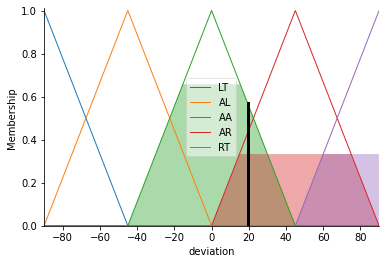

In [ ]:
print(mobile_robot.output['deviation'])
deviation.view(sim=mobile_robot)